# 통계분석 과제 (ANOVA)
## One -Way ANOVA 
- titanic 데이터에서 class에 따른 평균 fare의 차이가 있는지를 검정하세요 


In [21]:
import pandas as pd 
import seaborn as sns
df_t = pd.read_csv('titanic.csv')

In [22]:
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:xlabel='class', ylabel='fare'>

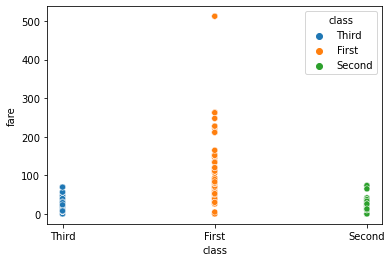

In [23]:
sns.scatterplot(x = "class",y = "fare", data = df_t, hue = "class")

In [28]:
# titanic 데이터에서 class에 따른 평균 fare의 차이가 있는지를 검정하세요
# 정규성 검정
import scipy.stats as stats

first = df_t.loc[df_t["class"] == "First", "fare"]
second = df_t.loc[df_t["class"] == "Second", "fare"]
third = df_t.loc[df_t["class"] == "Third", "fare"]

print(stats.shapiro(first)) #정규성 기각
print(stats.shapiro(second))
print(stats.shapiro(third))

ShapiroResult(statistic=0.718401312828064, pvalue=7.556354866266318e-19)
ShapiroResult(statistic=0.7785055637359619, pvalue=2.1134516002102284e-15)
ShapiroResult(statistic=0.6183854937553406, pvalue=1.5995106796893175e-31)


In [29]:
# 정규성을 만족한다는 가정하에 등분산성 검정 
print(stats.levene(first, second, third)) #등분산성 기각

LeveneResult(statistic=118.57020037111805, pvalue=2.288618662046418e-46)


In [31]:
# 정규성을 만족하지 않음으로 kruskal 검정 시행

stats.kruskal(first, second, third) # p_value가 0.05 보다 작으므로 유의미한 차이가 있음

KruskalResult(statistic=438.0437034212556, pvalue=7.586096900646798e-96)

In [35]:
# 정규성이 만족한다고 가정하고 등분산성이 만족하지 않는다고 가정

import pingouin as pg
pg.welch_anova(data = df_t, dv = "fare", between = "class")

,Source,ddof1,ddof2,F,p-unc,np2
0,class,2,333.633374,102.000587,2.707903e-35,0.353094


In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data = df_t["fare"], groups = df_t["class"])

In [40]:
tukeyhsd = mc.tukeyhsd(alpha = 0.05)
tukeyhsd.summary() 
# p-adj : 두 집단간 p_value
# reject : True이면 대립가설 채택

group1,group2,meandiff,p-adj,lower,upper,reject
First,Second,-63.4925,0.001,-72.9167,-54.0683,True
First,Third,-70.4791,0.001,-78.1491,-62.8092,True
Second,Third,-6.9866,0.1081,-15.1066,1.1333,False


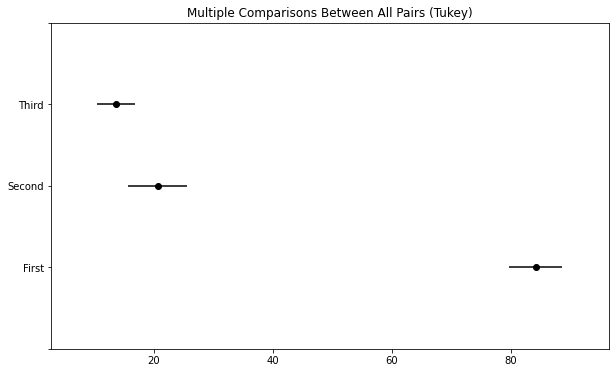

In [41]:
fig = tukeyhsd.plot_simultaneous()


## Two -Way ANOVA 
- titanic 데이터에서 class와 sex에 따른 fare의 차이를 검정하세요. 
- 1. 교호작용효과 검정 
- 2. class효과 검정 
- 3. sex 효과 검정 

In [42]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [45]:
df_t["class"].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [46]:
df_t["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [61]:
new_df2 = df_t[["class","sex","fare"]]

# 각 컬럼들을 시리즈로 변환
t_class = new_df["class"]
t_sex = new_df["sex"]
t_fare = new_df["fare"]

In [62]:
formula = "t_fare ~ C(t_class)*C(t_sex)"
model = ols(formula, new_df2).fit()
aov_table = anova_lm(model, typ=2)

In [63]:
aov_table 

,sum_sq,df,F,PR(>F)
C(t_class),7.347122e+05,2.0,242.620968,9.763645e-85
C(t_sex),3.174857e+04,1.0,20.968394,5.337586e-06
C(t_class):C(t_sex),5.002816e+04,2.0,16.520591,9.034206e-08
Residual,1.339992e+06,885.0,NaN,NaN


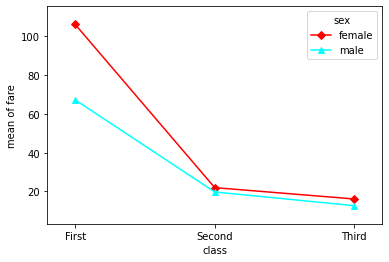

In [65]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig = interaction_plot(t_class, t_sex, t_fare, markers = ["D","^"])